In [63]:
# Import Modules
import pandas as pd
from pathlib import Path

In [65]:
# Set paths to csv files
call_volume = Path("./data/Call_Volume_20211102.csv")
returns = Path("./data/Stock_Returns_20211102.csv")

#sp500_path = Path("../Resources/sp500.csv")

In [80]:
# Read in csv files
call_volume_df = pd.read_csv(
    call_volume, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
)

price_df = pd.read_csv(
    returns, 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
)

#call_volume_df
price_df

,AAPL,TSLA,F,BABA,BAC,T,AMD,PLTR,AAL,NIO,...,RADA,DBI,GDOT,RL,SUMO,CNDT,IO,LL,DOLE,SYK
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,62.922,62.662,8.7413,176.46,30.3650,33.9283,34.89,NaN,30.3491,1.52,...,5.03,16.3404,29.08,95.3355,NaN,6.37,8.7656,9.11,NaN,208.0469
2019-11-04,63.335,63.494,8.8495,179.69,30.9379,33.8761,36.29,NaN,30.7364,1.71,...,5.55,16.8929,29.36,96.3571,NaN,6.54,8.8028,9.34,NaN,200.6156
2019-11-05,63.244,63.444,8.8692,182.00,31.3389,34.1200,36.15,NaN,31.0652,2.34,...,5.54,17.8718,29.32,99.2953,NaN,6.67,8.7749,9.38,NaN,193.9666
2019-11-06,63.271,65.316,8.7708,184.16,31.3103,34.1896,35.93,NaN,30.8460,2.03,...,5.36,18.1431,29.41,98.1473,NaN,6.62,8.4406,9.14,NaN,196.5480
2019-11-07,64.001,67.108,8.7413,186.66,31.7304,34.3377,36.28,NaN,30.7763,2.07,...,5.14,18.0365,29.95,112.5366,NaN,7.38,8.7006,9.33,NaN,196.3231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,148.850,1037.860,15.5100,169.23,47.0400,25.0600,122.28,25.06,19.0300,39.31,...,10.10,12.9700,43.15,121.8200,17.03,6.65,1.9200,17.91,14.72,268.5000
2021-10-28,152.570,1077.040,16.8600,169.79,47.7800,25.5500,121.16,25.64,19.1900,40.79,...,10.16,13.3300,43.26,124.7500,17.27,6.75,1.9200,18.12,14.58,268.4400
2021-10-29,149.800,1114.000,17.0800,164.94,47.7800,25.2600,120.23,25.88,19.2000,39.41,...,10.23,13.5300,42.36,127.1700,17.27,6.75,1.9700,18.08,14.60,266.0700


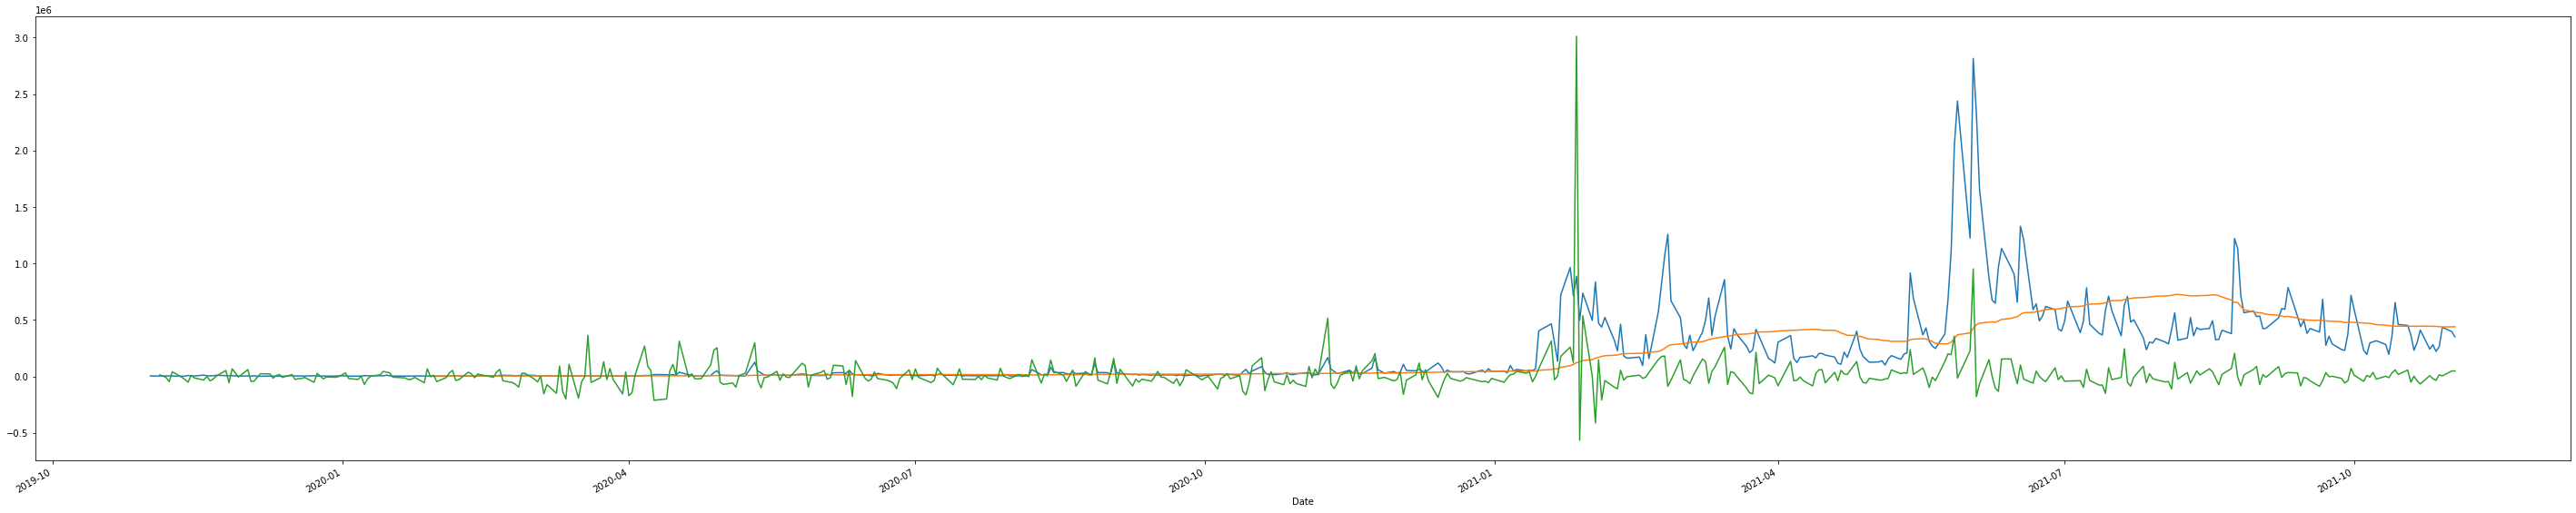

In [96]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()
#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1

pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [130]:
shifted = price_df.shift(periods=-5, axis="rows")
five_day_return = shifted/price_df-1

ticker_names = list(five_day_return)

trailing_sixty_day = sixty_day_rolling_volume_df.shift(periods=-1, axis="rows")
volume_indicator = 4 * trailing_sixty_day

good_signal = {}
no_signal = {}

for ticker in ticker_names:
    i = 0
    good_signal[ticker] = []
    no_signal[ticker] = []

    for value in call_volume_df[ticker]:
        date = call_volume_df.index[i]
        if(value > volume_indicator[ticker][i]):
            good_signal[ticker].append(date)
        else:
            no_signal[ticker].append(date)
        i+= 1

good_signal

{'AAPL': [],
 'TSLA': [],
 'F': [Timestamp('2020-06-05 00:00:00'),
  Timestamp('2021-01-21 00:00:00'),
  Timestamp('2021-05-21 00:00:00'),
  Timestamp('2021-05-26 00:00:00'),
  Timestamp('2021-05-27 00:00:00'),
  Timestamp('2021-06-03 00:00:00'),
  Timestamp('2021-10-28 00:00:00')],
 'BABA': [Timestamp('2020-05-22 00:00:00'),
  Timestamp('2020-07-08 00:00:00'),
  Timestamp('2020-12-24 00:00:00')],
 'BAC': [Timestamp('2021-03-03 00:00:00'), Timestamp('2021-06-02 00:00:00')],
 'T': [Timestamp('2020-04-15 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2021-01-07 00:00:00'),
  Timestamp('2021-04-07 00:00:00'),
  Timestamp('2021-07-07 00:00:00')],
 'AMD': [Timestamp('2021-07-29 00:00:00'), Timestamp('2021-08-04 00:00:00')],
 'PLTR': [],
 'AAL': [Timestamp('2020-06-04 00:00:00'), Timestamp('2020-06-05 00:00:00')],
 'NIO': [Timestamp('2020-06-03 00:00:00'),
  Timestamp('2020-06-04 00:00:00'),
  Timestamp('2020-06-09 00:00:00'),
  Timestamp('2020-07-02 00:00:00'),
  Timestamp('20

In [127]:
#call_volume_df.iloc[2]['AAPL']
#call_volume_df[call_volume_df[ticker]== call_volume_df.iloc[2]['AAPL']].index.values

call_volume_df.index[0]



Timestamp('2019-11-01 00:00:00')